In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [25]:
data_path = os.getcwd() + "\Data\Transformed_Data\\forwards_midfielders_correlated.csv"

df = pd.read_csv(data_path)
df.head()

,Season,name,position,team,total_points,bps,influence,goals_scored,ict_index,bonus,threat,minutes,creativity,assists,value,clean_sheets,selected
0,2021-22,Mattéo Guendouzi,MID,Arsenal,0,0,0.0,0,0.0,0,0.0,0,0.0,0,45,0,102
1,2021-22,Amad Diallo,MID,Man Utd,0,0,0.0,0,0.0,0,0.0,0,0.0,0,50,0,0
2,2021-22,Granit Xhaka,MID,Arsenal,0,0,0.0,0,0.0,0,0.0,0,0.0,0,48,0,24703
3,2021-22,Gabriel Teodoro Martinelli Silva,MID,Arsenal,5,17,21.0,0,8.6,0,32.0,90,33.1,1,52,0,16436
4,2021-22,Alexandre Lacazette,FWD,Arsenal,1,3,0.2,0,0.0,0,0.0,11,0.0,0,83,0,96187


<AxesSubplot:>

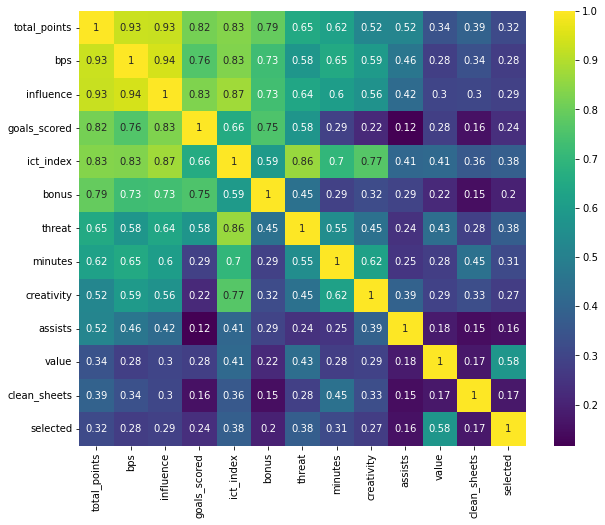

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43217 entries, 0 to 43216
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Season        43217 non-null  object 
 1   name          43217 non-null  object 
 2   position      43217 non-null  object 
 3   team          43217 non-null  object 
 4   total_points  43217 non-null  int64  
 5   bps           43217 non-null  int64  
 6   influence     43217 non-null  float64
 7   goals_scored  43217 non-null  int64  
 8   ict_index     43217 non-null  float64
 9   bonus         43217 non-null  int64  
 10  threat        43217 non-null  float64
 11  minutes       43217 non-null  int64  
 12  creativity    43217 non-null  float64
 13  assists       43217 non-null  int64  
 14  value         43217 non-null  int64  
 15  clean_sheets  43217 non-null  int64  
 16  selected      43217 non-null  int64  
dtypes: float64(4), int64(9), object(4)
memory usage: 5.6+ MB


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_points,43217.0,1.737626,2.761114,-2.0,0.0,1.0,2.0,29.0
bps,43217.0,6.671171,10.556211,-18.0,0.0,2.0,10.0,114.0
influence,43217.0,8.302321,14.631871,0.0,0.0,0.4,10.6,163.6
goals_scored,43217.0,0.087952,0.323430,0.0,0.0,0.0,0.0,4.0
ict_index,43217.0,2.598128,3.896291,0.0,0.0,0.4,4.0,35.8
bonus,43217.0,0.141842,0.570195,0.0,0.0,0.0,0.0,3.0
threat,43217.0,9.805725,18.321933,0.0,0.0,0.0,12.0,186.0
minutes,43217.0,37.174700,39.951013,0.0,0.0,15.0,90.0,90.0
creativity,43217.0,7.905866,13.442416,0.0,0.0,0.6,12.3,170.9
assists,43217.0,0.069116,0.278027,0.0,0.0,0.0,0.0,4.0


Let's look at the distribution of total points.

C:\Users\GV147BE\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_points', ylabel='Density'>

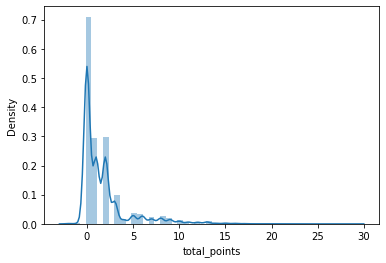

In [29]:
sns.distplot(df['total_points'])

We can see that there are a large amount of 0 total_points entries, we need to check if this is because they did not play any minutes.

In [30]:
print('Not Played: ', len(df[df['minutes']==0]))
print('Played: ', len(df[df['minutes']!=0]))
print('% Not Played: ', len(df[df['minutes']==0])/len(df)*100,'%')

Not Played:  18596
Played:  24621
% Not Played:  43.02936344494065 %


We need to remove 43.0% of our data points... not good!

In [31]:
df = df[df['minutes']!=0]
df.head()

,Season,name,position,team,total_points,bps,influence,goals_scored,ict_index,bonus,threat,minutes,creativity,assists,value,clean_sheets,selected
3,2021-22,Gabriel Teodoro Martinelli Silva,MID,Arsenal,5,17,21.0,0,8.6,0,32.0,90,33.1,1,52,0,16436
4,2021-22,Alexandre Lacazette,FWD,Arsenal,1,3,0.2,0,0.0,0,0.0,11,0.0,0,83,0,96187
5,2021-22,Anthony Martial,FWD,Man Utd,1,3,0.0,0,0.0,0,0.0,2,0.0,0,76,0,50595
7,2021-22,Cristiano Ronaldo dos Santos Aveiro,FWD,Man Utd,13,53,71.0,2,14.9,3,75.0,87,2.9,0,123,0,2348347
8,2021-22,Edward Nketiah,FWD,Arsenal,1,6,3.2,0,0.4,0,0.0,11,0.5,0,54,0,11032


<AxesSubplot:>

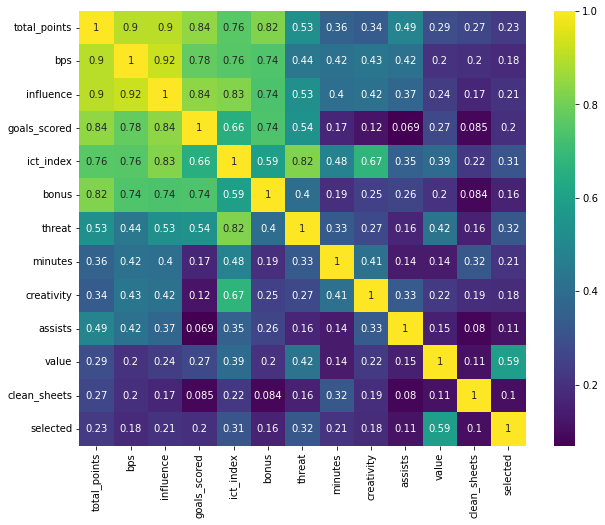

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

removing the zero minutes rows has affected the correlation of variables slightly but it is possible that before variables were over-correlated.

C:\Users\GV147BE\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_points', ylabel='Density'>

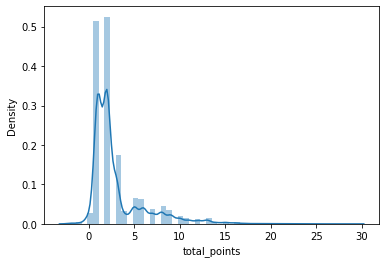

In [33]:
#let's look at our dist plot again
sns.distplot(df['total_points'])

In [18]:
df['total_points'].value_counts().sort_values()

 29        1
 26        1
-7         1
-6         1
-4         5
 24        6
 19       15
 20       16
 21       18
 18       25
-3        28
 17       40
 16       69
-2       106
 14      141
 15      168
 13      251
-1       265
 12      309
 11      366
 10      499
 4       753
 9       896
 8      1272
 7      1392
 5      1645
 0      1845
 3      3421
 6      3474
 2     12318
 1     13333
Name: total_points, dtype: int64

We can see that the most frequent score for an attacker is 1 point.

Let's investigate the relationship between price and total points to see if you get bang for your buck with attackers.

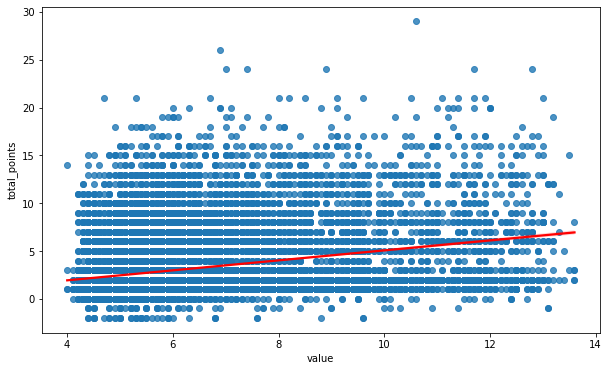

In [35]:
#scale the value column to reflect prices in the game
df['value'] = df['value'] / 10

plt.figure(figsize=(10,6))
sns.regplot(x='value',y='total_points',data=df, line_kws={"color": "red"})
plt.show()

As we can see there is some correlation between value and total_points. 

To check this lets look at total_points per season for each attacker.

In [36]:
players = df[['name', 'Season', 'total_points', 'value']]
players.head()

,name,Season,total_points,value
3,Gabriel Teodoro Martinelli Silva,2021-22,5,5.2
4,Alexandre Lacazette,2021-22,1,8.3
5,Anthony Martial,2021-22,1,7.6
7,Cristiano Ronaldo dos Santos Aveiro,2021-22,13,12.3
8,Edward Nketiah,2021-22,1,5.4


In [37]:
players = players.groupby(['name', 'Season']).agg({'total_points': 'sum', 'value': 'mean'})
players.reset_index(inplace=True)
players.sort_values(by='total_points')

,name,Season,total_points,value
59,Alexandre Jankewitz,2020-21,-1,4.500000
768,Mark Noble,2021-22,0,4.500000
170,Bruno André Cavaco Jordao,2019-20,1,4.500000
1143,Taylor Richards,2021-22,1,4.500000
887,Nathan Tella,2019-20,1,4.500000
...,...,...,...,...
435,Harry Kane,2020-21,242,11.137143
172,Bruno Miguel Borges Fernandes,2020-21,244,11.167568
698,Kevin De Bruyne,2019-20,251,10.331429
844,Mohamed Salah,2018-19,259,13.181579


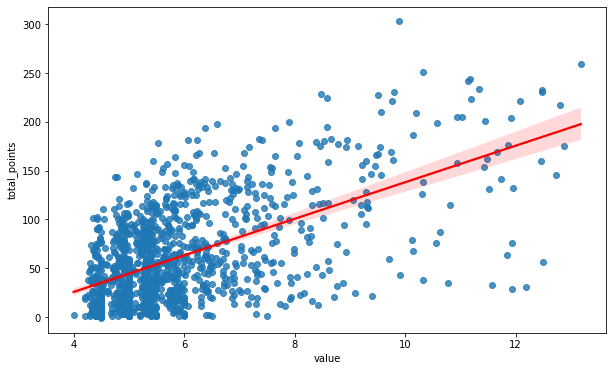

In [45]:
plt.figure(figsize=(10,6))
sns.regplot(x='value',y='total_points',data=players, line_kws={"color": "red"})
plt.show()

We can see that over the course of a season that there is an increase in total points with price. This indicates that is worth spending high on a few defenders if you can get it right!

Let's investigate if it matters which team you get your defenders from.

In [40]:
teams = df[['team', 'Season', 'total_points', 'value']]
teams.head()

,team,Season,total_points,value
3,Arsenal,2021-22,5,5.2
4,Arsenal,2021-22,1,8.3
5,Man Utd,2021-22,1,7.6
7,Man Utd,2021-22,13,12.3
8,Arsenal,2021-22,1,5.4


In [41]:
teams = teams.groupby(['team', 'Season']).agg({'total_points': 'sum', 'value': 'mean'})
teams.reset_index(inplace=True)
teams.sort_values(by='total_points')

,team,Season,total_points,value
43,Fulham,2016-17,3,4.300000
81,Norwich,2017-18,3,5.366667
83,Norwich,2020-21,8,4.340000
85,Sheffield Utd,2016-17,19,4.925000
87,Sheffield Utd,2018-19,28,4.916667
...,...,...,...,...
39,Everton,2018-19,1280,5.938987
67,Man City,2020-21,1301,8.028179
59,Liverpool,2018-19,1330,7.506325
60,Liverpool,2019-20,1388,7.206154


C:\Users\GV147BE\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_points', ylabel='Density'>

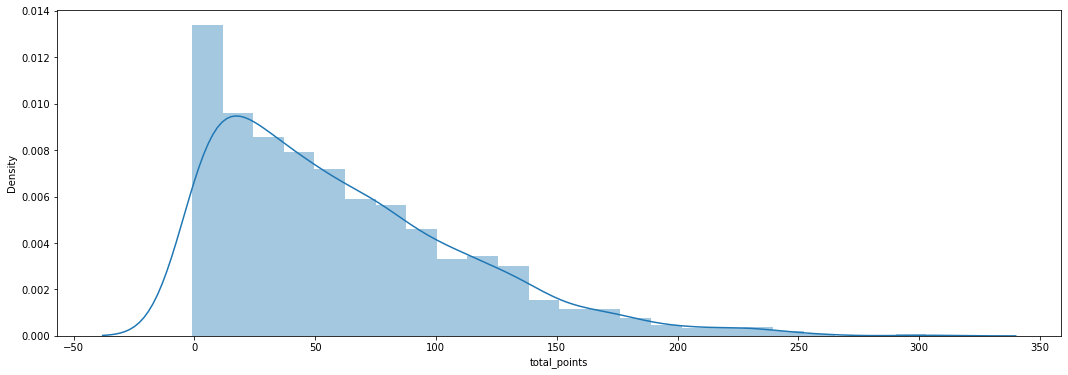

In [42]:
plt.figure(figsize=(18,6))
sns.distplot(players['total_points'])

It looks like that most teams defenders get a similar total over the course of a season, apart from a few. It could be worth considering backing historically good attacks like Man City and Liverpool. 

Let's have a look at how stable the ict_index variable is, as when inputting to the model we will have to predict this by aggregating player past performance.

C:\Users\GV147BE\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ict_index', ylabel='Density'>

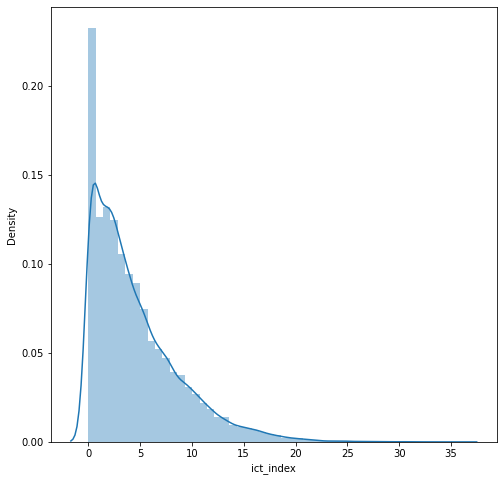

In [43]:
plt.figure(figsize=(8,8))
sns.distplot(df['ict_index'])

This variable has a left-skewed distribution.

Let's have a look at selected vs total_points, i.e. are the general public good at choosing attackers?

<AxesSubplot:xlabel='total_points', ylabel='selected'>

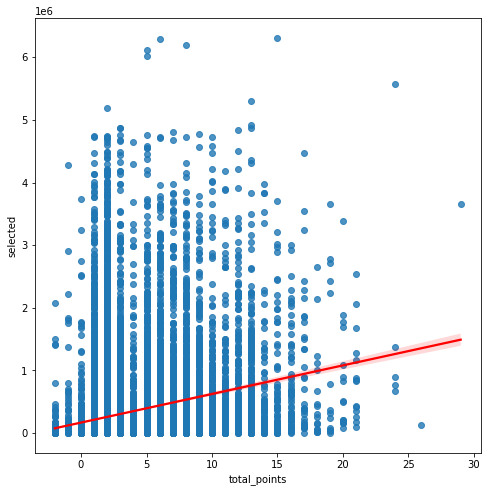

In [47]:
plt.figure(figsize=(8,8))
sns.regplot(x='total_points', y='selected', data=df, line_kws={"color": "red"})

There is a slight correlation but in general the public is ok at selecting attackers.

Finally let's look at total_points vs bps

<AxesSubplot:xlabel='bps', ylabel='total_points'>

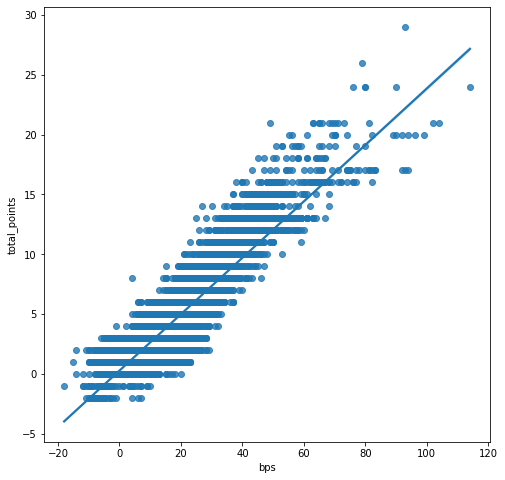

In [48]:
plt.figure(figsize=(8,8,))
sns.regplot(x='bps', y='total_points', data=df)

As expected this shows good correlation. This is interesting as it is such a powerful predictor but there are only 3 players per match that receive bonus points.

<h1>Let's save the datasets again based on what we found out</h1>

In [51]:
data_path = os.getcwd() + "\Data\Transformed_Data"

forwards_midfielders_correlated = pd.read_csv(data_path + "\\forwards_midfielders_correlated.csv")
forwards_midfielders_correlated = forwards_midfielders_correlated[forwards_midfielders_correlated['minutes']!=0]
forwards_midfielders_correlated.to_csv(data_path + "\\forwards_midfielders_correlated.csv", index=False)

forwards_midfielders = pd.read_csv(data_path + "\\forwards_midfielders.csv")
forwards_midfielders = forwards_midfielders[forwards_midfielders['minutes']!=0]
forwards_midfielders.to_csv(data_path + "\\forwards_midfielders.csv", index=False)

print(len(forwards_midfielders_correlated))
print(len(forwards_midfielders))

24621
24621
